In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab
%matplotlib inline
#plt.style.use('seaborn')

In [2]:
XLS = pd.ExcelFile('LabeledComputationData.xlsx')
XLS2 = pd.ExcelFile('Questions.xlsx')
df = XLS.parse('LabeledComputationData')
questions = XLS2.parse('Sheet1')

In [3]:
df.head()

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q179,Q180,NAME,CITY,STABBR,BASIC2015,HBCUfact,ModClassfact,Phy.Degfact,ModClass2fact
0,10120,No,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,NaN,Valid Skip,Valid Skip,...,NaN,No,Alabama A & M University,Normal,AL,18,Yes,Masters Colleges- Larger Programs,Phd,Masters
1,10200,No,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,NaN,Valid Skip,Valid Skip,...,NaN,NaN,Marion Military Institute,Marion,AL,1,No,Associates - All,Associates,Associates
2,10220,No,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,NaN,Valid Skip,Valid Skip,...,NaN,I believe computational physics in the undergr...,Southern Union State Community College,Wadley,AL,1,No,Associates - All,Associates,Associates
3,10240,No,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,NaN,Valid Skip,Valid Skip,...,NaN,none,Tuskegee University,Tuskegee,AL,20,Yes,Masters Colleges- Medium & Small Programs,Bachelors,Masters
4,10270,No,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,NaN,Valid Skip,Valid Skip,...,NaN,NaN,Tuskegee University,Tuskegee,AL,20,Yes,Masters Colleges- Medium & Small Programs,Bachelors,Masters


In [34]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head()

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Has Mathematica,Has Maple,University Support,Departmental Support,Colleague Support,Time Off,Stipend,TA Support,Active Discouragement,Departmental Apathy
0,10120,No,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,NaN,Valid Skip,Valid Skip,...,0,0,0,0,0,0,0,0,0,0
1,10200,No,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,NaN,Valid Skip,Valid Skip,...,0,0,0,0,0,0,0,0,0,0
2,10220,No,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,NaN,Valid Skip,Valid Skip,...,0,0,0,0,0,0,0,0,0,0
3,10240,No,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,NaN,Valid Skip,Valid Skip,...,0,0,0,0,0,0,0,0,0,0
4,10270,No,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,NaN,Valid Skip,Valid Skip,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df['HBCU'] = pd.factorize(df['HBCUfact'])[0]
df['Highest Degree Offered'] = pd.factorize(df['Phy.Degfact'])[0]
df['Institution Type'] = pd.factorize(df['ModClass2fact'])[0]
df['Has MATLAB'] = pd.factorize(df['Q56'])[0]
df['Has Mathematica'] = pd.factorize(df['Q57'])[0]
df['Has Maple'] = pd.factorize(df['Q58'])[0]
df['University Support'] = pd.factorize(df['Q62'])[0]
df['Departmental Support'] = pd.factorize(df['Q63'])[0]
df['Colleague Support'] = pd.factorize(df['Q64'])[0]
df['Time Off'] = pd.factorize(df['Q65'])[0]
df['Stipend'] = pd.factorize(df['Q66'])[0]
df['TA Support'] = pd.factorize(df['Q67'])[0]
df['Active Discouragement'] = pd.factorize(df['Q68'])[0]
df['Departmental Apathy'] = pd.factorize(df['Q69'])[0]
df.head()

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Has Mathematica,Has Maple,University Support,Departmental Support,Colleague Support,Time Off,Stipend,TA Support,Active Discouragement,Departmental Apathy
0,10120,No,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,NaN,Valid Skip,Valid Skip,...,0,0,0,0,0,0,0,0,0,0
1,10200,No,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,NaN,Valid Skip,Valid Skip,...,0,0,0,0,0,0,0,0,0,0
2,10220,No,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,NaN,Valid Skip,Valid Skip,...,0,0,0,0,0,0,0,0,0,0
3,10240,No,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,NaN,Valid Skip,Valid Skip,...,0,0,0,0,0,0,0,0,0,0
4,10270,No,Valid Skip,Valid Skip,Valid Skip,Valid Skip,Valid Skip,NaN,Valid Skip,Valid Skip,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [37]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 951
Number of observations in the test data: 295


In [38]:
# Create a list of the feature column's names
features = df.columns[190:]

features

Index(['HBCU', 'Highest Degree Offered', 'Institution Type', 'Has MATLAB',
       'Has Mathematica', 'Has Maple', 'University Support',
       'Departmental Support', 'Colleague Support', 'Time Off', 'Stipend',
       'TA Support', 'Active Discouragement', 'Departmental Apathy'],
      dtype='object')

In [39]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train.Q1)[0]

In [40]:
# Create a random forest classifier. By convention, clf means 'classifier'
clf = RandomForestClassifier(n_jobs=4,n_estimators=128,oob_score=True)

# Train the classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=128, n_jobs=4, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [28]:
oob_error = 1 - clf.oob_score_
print(oob_error)

0.0


In [41]:
# Apply the classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features]);

In [42]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [43]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

[('HBCU', 0.0),
 ('Highest Degree Offered', 0.00023303161972538795),
 ('Institution Type', 0.0),
 ('Has MATLAB', 0.023389469496213379),
 ('Has Mathematica', 0.083661776029860094),
 ('Has Maple', 0.018293856428826537),
 ('University Support', 0.035037942426069141),
 ('Departmental Support', 0.02435290174377119),
 ('Colleague Support', 0.078130437974063438),
 ('Time Off', 0.12101255892375658),
 ('Stipend', 0.194732274801376),
 ('TA Support', 0.15661953399781639),
 ('Active Discouragement', 0.22613458711216455),
 ('Departmental Apathy', 0.038401629446357319)]

Index(['HBCU', 'Highest Degree Offered', 'Institution Type', 'Has MATLAB',
       'Has Mathematica', 'Has Maple', 'University Support',
       'Departmental Support', 'Colleague Support', 'Time Off', 'Stipend',
       'TA Support', 'Active Discouragement', 'Departmental Apathy'],
      dtype='object')


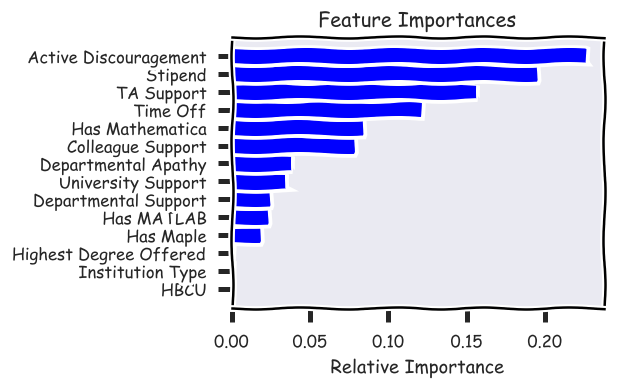

In [57]:
plt.figure(num=None, figsize=(4, 3), dpi=120, facecolor='w', edgecolor='k')

importances = clf.feature_importances_
indices = np.argsort(importances)

print(features)

#plt.xkcd()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [16]:
test['Q8'].head()

2    Valid Skip
3    Valid Skip
4    Valid Skip
5     Unchecked
6    Valid Skip
Name: Q8, dtype: object

In [17]:
preds = clf.predict(test[features])

In [ ]:
pd.crosstab(test['Q8'], preds, rownames=['Actual Answer'], colnames=['Predicted Answer'])

In [45]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
i_tree = 0

for tree_in_forest in clf.estimators_:
    
    dotfile = './forests/'+'tree_' + str(i_tree) + '.dot'
    
    with open(dotfile, 'w') as my_file:
        
        dot_data = tree.export_graphviz(tree_in_forest, 
                                       out_file = None, 
                                       feature_names=features,
                                       class_names=['Yes','No'],
                                       filled=True)
        
        graph = pydotplus.graph_from_dot_data(dot_data)
        #print(graph)
        graph.write_png('forests/'+'tree_' + str(i_tree) + '.png')
    
    i_tree = i_tree + 1